# Exercise Link

Link -> https://github.com/mrdbourke/tensorflow-deep-learning#-08-introduction-to-nlp-natural-language-processing-in-tensorflow-exercises

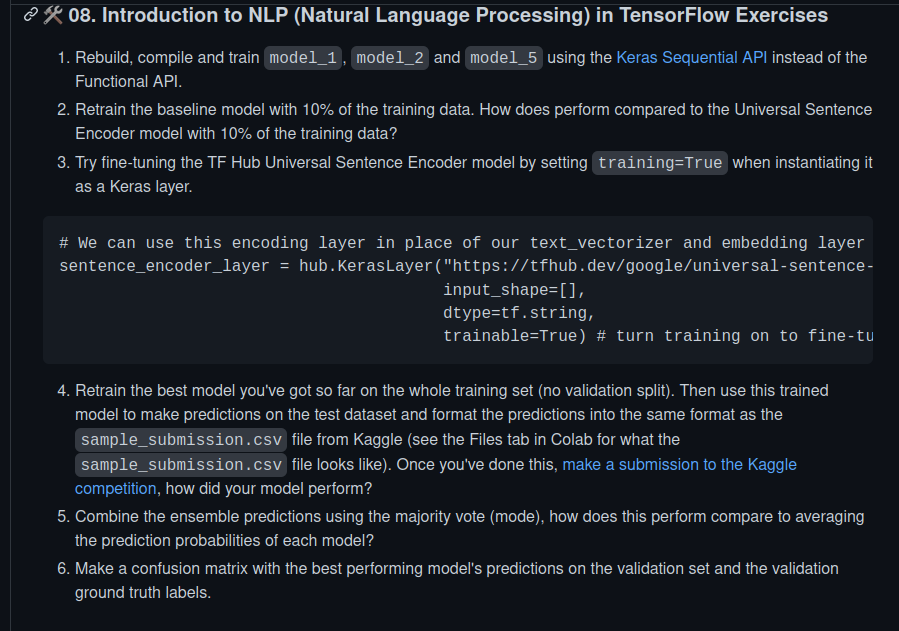


## Extra-curriculum



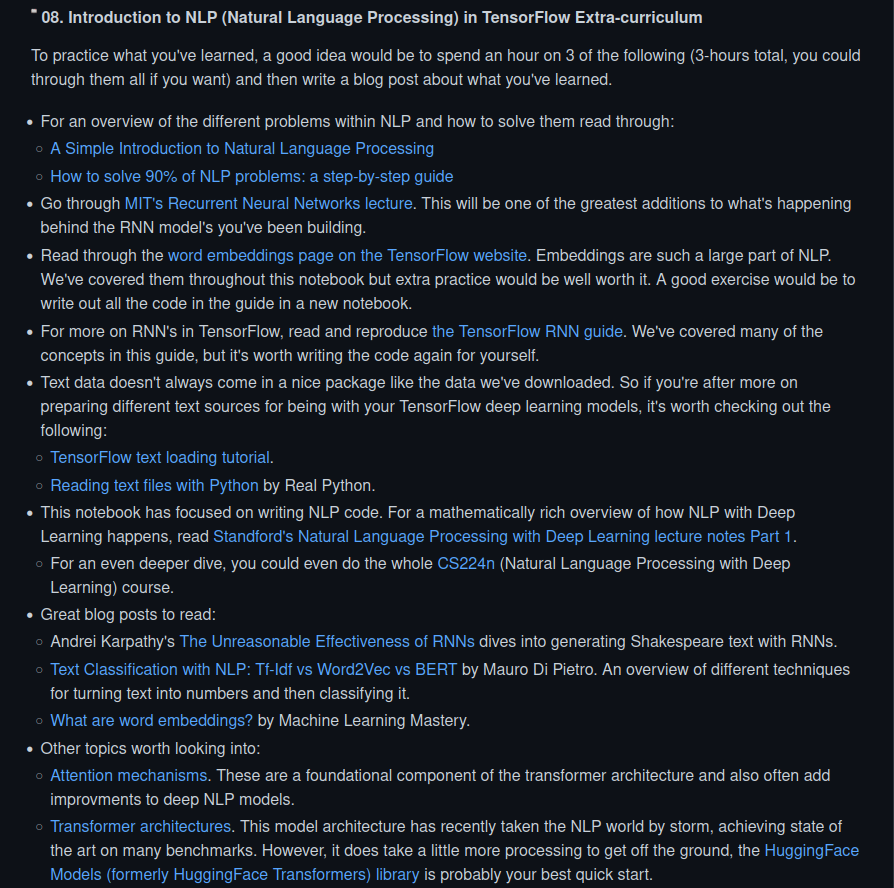

## Helper Function

In [1]:
!wget https://raw.githubusercontent.com/arghanath007/MachineLearning/main/Deep%20Learning/Transfer%20Learning/helper_functions.py

--2022-08-23 10:51:42--  https://raw.githubusercontent.com/arghanath007/MachineLearning/main/Deep%20Learning/Transfer%20Learning/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19296 (19K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  18.84K  --.-KB/s    in 0.001s  

2022-08-23 10:51:42 (26.2 MB/s) - ‘helper_functions.py’ saved [19296/19296]



In [2]:
from helper_functions import unzip_data, plot_loss_curves, compare_historys, create_data_augmented_layer_for_model, load_and_prep_image, make_confusion_matrix, make_confusion_matrix_for_larger_dataset, calculate_results

## Getting the data

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2022-08-23 10:51:45--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.103.128, 108.177.121.128, 108.177.120.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.103.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.004s  

2022-08-23 10:51:45 (147 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [4]:
unzip_data('nlp_getting_started.zip')

## Imports

In [81]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from tensorflow.keras import layers
from tensorflow.keras.layers import TextVectorization


In [6]:
train= pd.read_csv('/content/train.csv')
test= pd.read_csv('/content/test.csv')

In [7]:
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [8]:
len(train), len(test)

(7613, 3263)

## Shuffeling the training dataset

In [9]:
train_shuffled= train.sample(frac= 1, random_state=22)
train_shuffled

,id,keyword,location,text,target
1467,2115,catastrophe,Florida,@deb117 7/30 that catastrophe man opens school...,0
6453,9232,suicide%20bombing,NaN,meek mill should join isis since he loves suic...,0
5698,8131,rescued,Ireland,Three beached whales rescued in Kerry - http:/...,1
5769,8236,riot,Seattle,Southeast Dirt Riot Series Crowns Champions: ...,0
6853,9822,trauma,NaN,Hiroshima: They told me to paint my story: Eig...,1
...,...,...,...,...,...
356,513,army,Studio,But if you build an army of 100 dogs and their...,1
7104,10177,violent%20storm,NaN,I don't understand 'taking' ANY life as a trop...,1
4908,6985,massacre,NaN,@nataliealund \nParents of Colorado theater sh...,1
6276,8967,storm,"Wilmington, NC",New item: Pillow Covers ANY SIZE Pillow Cover ...,0


In [10]:
train_shuffled_sentences= train_shuffled['text'].to_numpy()
train_shuffled_sentences

array(["@deb117 7/30 that catastrophe man opens school w/another he's an athlete not a teacher a principle not fulfilling any inside clerical duties",
       'meek mill should join isis since he loves suicide-bombing his career for no good reason',
       'Three beached whales rescued in Kerry - http://t.co/rQbsPUCjDF',
       ...,
       '@nataliealund \nParents of Colorado theater shooting victim fear copycat massacre\n\nhttp://t.co/LvlH3W3aWO\n#Antioch\n\nhttp://t.co/vIwXY1XDYK',
       'New item: Pillow Covers ANY SIZE Pillow Cover Grey Pillow Pillows Premier Prints Lulu Storm Grey by MyPillowStudio \x89Û_ http://t.co/M4pqkKeEVC',
       "@God how come bugs haven't all drowned out of existence every time it rains?"],
      dtype=object)

In [11]:
train_shuffled_labels=train_shuffled['target'].to_numpy()
train_shuffled_labels

array([0, 0, 1, ..., 1, 0, 0])

## Splitting the datasets

In [12]:
train_sentences, val_sentences, train_labels, val_labels= train_test_split(train_shuffled_sentences, train_shuffled_labels, test_size=0.1, random_state=24)

In [13]:
len(train_sentences), len(val_sentences), len(val_labels)

(6851, 762, 762)

In [14]:
train_sentences[:5]

array(["Not even the Berlin wall survived the 80's I daubt they'll ever be a generation like the 80's @ChubyChux: ... http://t.co/71VdjHJnwV",
       'UNPREDICTABLE DISCONNECTED AND SOCIAL CASUALTY ARE MY FAVORITES HOW DO PEOPLE NOT LIKE THEM',
       'Wow. #FIFA16 has Pre Season Tournaments in Career Mode. Bloody hell evacuate the building #whocares',
       "'Tube strike live: Latest travel updates as London engulfed in chaos' &lt;- genuine baffling Telegraph headline",
       'CLEARED:incident with injury:I-495  inner loop Exit 31 - MD 97/Georgia Ave Silver Spring'],
      dtype=object)

In [15]:
train_labels[:5]

array([0, 1, 0, 1, 0])

In [16]:
train_sentences_10_percent_split= int(0.1 * len(train_sentences)) 
train_sentences_10_percent_split

685

In [17]:
train_sentences_10_percent= train_sentences[:train_sentences_10_percent_split]
len(train_sentences_10_percent)

685

In [18]:
train_labels_10_percent= train_labels[:train_sentences_10_percent_split]
len(train_labels_10_percent)

685

## Baseline Model with only 10% of the data

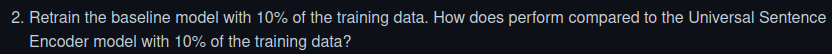

In [19]:
baseline_model= Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

baseline_model.fit(train_sentences_10_percent, train_labels_10_percent)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

### Evaluating the model

In [20]:
baseline_score= baseline_model.score(val_sentences, val_labels)
baseline_score

0.7519685039370079

In [21]:
baseline_pred_probs= baseline_model.predict(val_sentences)
baseline_preds= tf.squeeze(tf.round(baseline_pred_probs))
baseline_preds[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([0, 0, 0, 0, 0])>

In [22]:
baseline_results= calculate_results(val_labels, baseline_preds)
baseline_results

{'accuracy': 75.19685039370079,
 'precision': 0.7754290874088783,
 'recall': 0.7519685039370079,
 'f1': 0.7405650046503209}

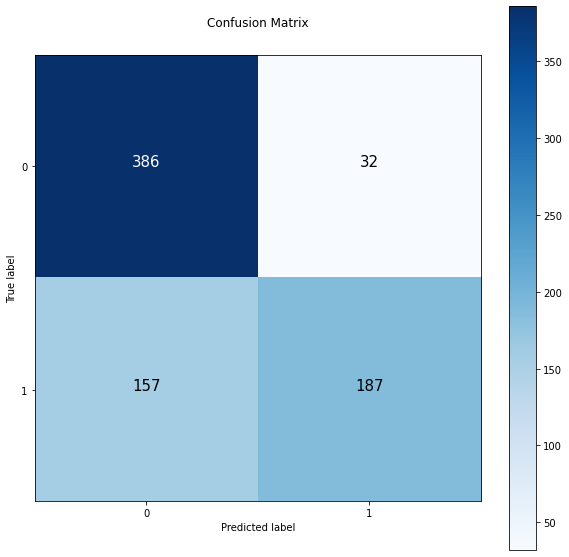

In [23]:
make_confusion_matrix(val_labels, baseline_preds)

## Conclusion

> The baseline model with `100%` of the dataset got an accuracy score of `83.33%`

> The baseline model with only `10%` of the dataset got an accuracy score of `75.19%`

> The `USE model` imported from Tensorflow Hub with was trained on only `10%` of the dataset got an accuracy score of `78.08%`

` This shows the power of Transfer Learning`

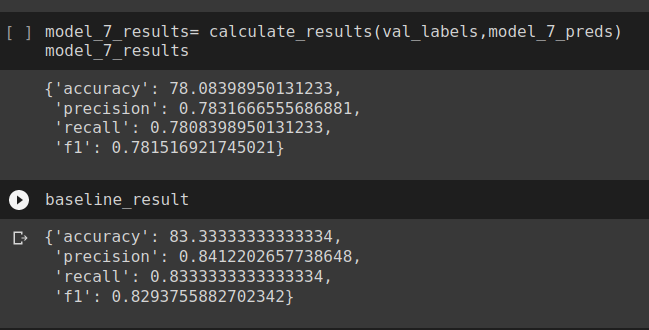


## Trying to Fine-Tune the `USE` model from Tensorflow Hub

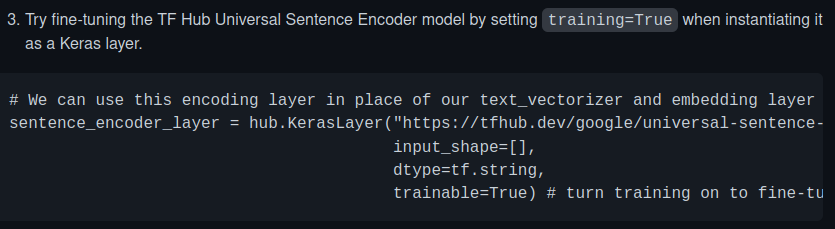

In [24]:
model_url="https://tfhub.dev/google/universal-sentence-encoder/4"

In [25]:
SAVE_DIR= 'tensorboard'

In [26]:
from helper_functions import create_tensorboard_callback

In [27]:
sentence_encoder_layer= hub.KerasLayer(model_url, input_shape=[], dtype="string", trainable=True, name="transfer_learning_USE")

In [28]:
model_1= tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(1, activation="sigmoid")
], name="USE_model_with_fine_tuning")

model_1.compile(loss= "binary_crossentropy", metrics=["accuracy"], optimizer= tf.keras.optimizers.Adam())

In [29]:
model_1.summary()

Model: "USE_model_with_fine_tuning"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 transfer_learning_USE (Kera  (None, 512)              256797824 
 sLayer)                                                         
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
Total params: 256,798,337
Trainable params: 256,798,337
Non-trainable params: 0
_________________________________________________________________


In [30]:
history_1= model_1.fit(train_sentences, train_labels,epochs=10, validation_data=(val_sentences, val_labels), callbacks=[create_tensorboard_callback(SAVE_DIR, "model_1_USE_with_fine_tuning")])

Saving TensorBoard log files to: tensorboard/model_1_USE_with_fine_tuning/20220823-105212
Epoch 1/10
215/215 [==============================] - 43s 155ms/step - loss: 0.4609 - accuracy: 0.7975 - val_loss: 0.4157 - val_accuracy: 0.8136
Epoch 2/10
215/215 [==============================] - 33s 153ms/step - loss: 0.2405 - accuracy: 0.9113 - val_loss: 0.4674 - val_accuracy: 0.7953
Epoch 3/10
215/215 [==============================] - 33s 152ms/step - loss: 0.0796 - accuracy: 0.9756 - val_loss: 0.6415 - val_accuracy: 0.7638
Epoch 4/10
215/215 [==============================] - 33s 153ms/step - loss: 0.0452 - accuracy: 0.9857 - val_loss: 0.6381 - val_accuracy: 0.7822
Epoch 5/10
215/215 [==============================] - 33s 152ms/step - loss: 0.0260 - accuracy: 0.9924 - val_loss: 0.6892 - val_accuracy: 0.7822
Epoch 6/10
215/215 [==============================] - 33s 155ms/step - loss: 0.0207 - accuracy: 0.9931 - val_loss: 0.8878 - val_accuracy: 0.7415
Epoch 7/10
215/215 [====================

In [31]:
model_1_pred_probs= model_1.predict(val_sentences)
model_1_preds= tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 0., 0., 1.], dtype=float32)>

In [32]:
model_1_results= calculate_results(val_labels, model_1_preds)
model_1_results

{'accuracy': 75.19685039370079,
 'precision': 0.7640712669354163,
 'recall': 0.7519685039370079,
 'f1': 0.7521688617968819}

In [33]:
baseline_results

{'accuracy': 75.19685039370079,
 'precision': 0.7754290874088783,
 'recall': 0.7519685039370079,
 'f1': 0.7405650046503209}

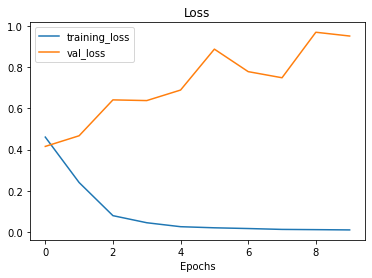

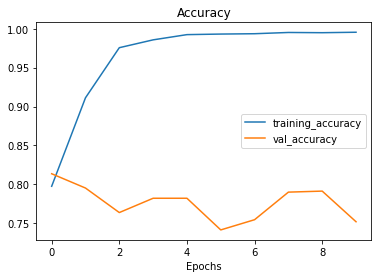

In [34]:
plot_loss_curves(history_1)

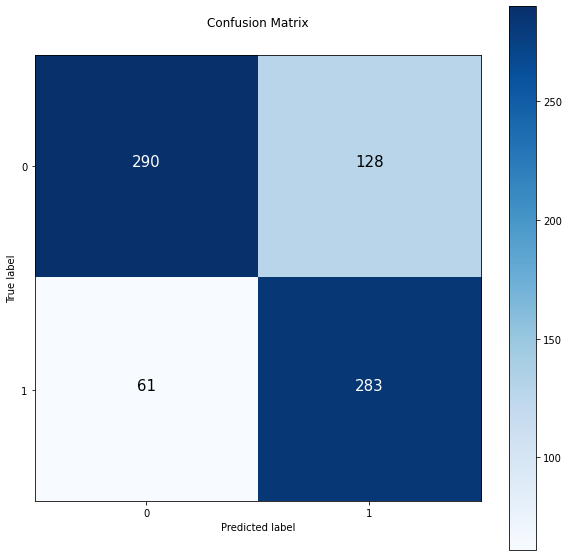

In [35]:
make_confusion_matrix(val_labels, model_1_preds)

## Examining the different datasets and their splits

In [36]:
len(train), len(train_shuffled), len(train_sentences), len(train_shuffled_sentences)

(7613, 7613, 6851, 7613)

In [37]:
train_shuffled[:5]

,id,keyword,location,text,target
1467,2115,catastrophe,Florida,@deb117 7/30 that catastrophe man opens school...,0
6453,9232,suicide%20bombing,NaN,meek mill should join isis since he loves suic...,0
5698,8131,rescued,Ireland,Three beached whales rescued in Kerry - http:/...,1
5769,8236,riot,Seattle,Southeast Dirt Riot Series Crowns Champions: ...,0
6853,9822,trauma,NaN,Hiroshima: They told me to paint my story: Eig...,1


In [38]:
train_shuffled_sentences[:5]

array(["@deb117 7/30 that catastrophe man opens school w/another he's an athlete not a teacher a principle not fulfilling any inside clerical duties",
       'meek mill should join isis since he loves suicide-bombing his career for no good reason',
       'Three beached whales rescued in Kerry - http://t.co/rQbsPUCjDF',
       'Southeast Dirt Riot Series Crowns Champions:  Southeast Dirt Riot Series Crowns ChampionsBLACKFOOT ID: The So... http://t.co/v9i4PfXO0C',
       'Hiroshima: They told me to paint my story: Eighty-nine year old man recalls the terror and the trauma when the... http://t.co/spE7U8t40K'],
      dtype=object)

In [39]:
train_shuffled_labels[:5]

array([0, 0, 1, 0, 1])

In [40]:
len(test)

3263

In [41]:
test[:5]

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


## Creating the test dataset for evaluation purposes 

In [42]:
test_sentences= test['text'].to_numpy()
len(test_sentences), test_sentences

(3263, array(['Just happened a terrible car crash',
        'Heard about #earthquake is different cities, stay safe everyone.',
        'there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all',
        ..., 'Green Line derailment in Chicago http://t.co/UtbXLcBIuY',
        'MEG issues Hazardous Weather Outlook (HWO) http://t.co/3X6RBQJHn3',
        '#CityofCalgary has activated its Municipal Emergency Plan. #yycstorm'],
       dtype=object))

## Training on the whole Dataset with splitting it into training and validation datasets. Predicting on the test dataset

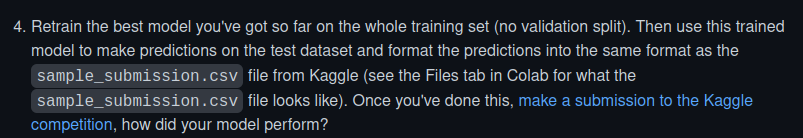

> I will be using both the models for training on the whole training dataset

## Model 4: USE trained on the whole training *dataset*

In [43]:
model_4= tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
], name="USE_model_with_fine_tuning")

model_4.compile(loss= "binary_crossentropy", metrics=["accuracy"], optimizer= tf.keras.optimizers.Adam())

In [44]:
model_4.summary()

Model: "USE_model_with_fine_tuning"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 transfer_learning_USE (Kera  (None, 512)              256797824 
 sLayer)                                                         
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 256,863,617
Trainable params: 256,863,617
Non-trainable params: 0
_________________________________________________________________


In [45]:
history_4= model_4.fit(train_shuffled_sentences, train_shuffled_labels, epochs=10, callbacks=[create_tensorboard_callback(SAVE_DIR, "model_4__USE_with_fine_tuning_on_whole_training_datase")])

Saving TensorBoard log files to: tensorboard/model_4__USE_with_fine_tuning_on_whole_training_datase/20220823-105840
Epoch 1/10
238/238 [==============================] - 41s 152ms/step - loss: 0.1045 - accuracy: 0.9660
Epoch 2/10
238/238 [==============================] - 37s 157ms/step - loss: 0.0355 - accuracy: 0.9886
Epoch 3/10
238/238 [==============================] - 36s 151ms/step - loss: 0.0205 - accuracy: 0.9921
Epoch 4/10
238/238 [==============================] - 36s 153ms/step - loss: 0.0164 - accuracy: 0.9937
Epoch 5/10
238/238 [==============================] - 36s 153ms/step - loss: 0.0143 - accuracy: 0.9949
Epoch 6/10
238/238 [==============================] - 36s 150ms/step - loss: 0.0144 - accuracy: 0.9947
Epoch 7/10
238/238 [==============================] - 36s 152ms/step - loss: 0.0115 - accuracy: 0.9953
Epoch 8/10
238/238 [==============================] - 36s 151ms/step - loss: 0.0101 - accuracy: 0.9950
Epoch 9/10
238/238 [==============================] - 36s 15

In [46]:
model_4_pred_probs = model_4.predict(test_sentences)
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds = tf.cast(model_4_preds , dtype = tf.int32)
model_4_preds[:20]

<tf.Tensor: shape=(20,), dtype=int32, numpy=
array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1],
      dtype=int32)>

## Model 5: Baseline Model trained on the whole training dataset

In [47]:
model_5= Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

history_5= model_5.fit(train_shuffled_sentences, train_shuffled_labels)

In [48]:
model_5_pred_probs = model_5.predict(test_sentences)
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds = tf.cast(model_5_preds , dtype = tf.int32)
model_5_preds[:20]

<tf.Tensor: shape=(20,), dtype=int32, numpy=
array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
      dtype=int32)>

## Checking the `Submission.csv` file

In [49]:
submission= pd.read_csv('/content/sample_submission.csv')
submission

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [50]:
submission.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [51]:
len(submission)

3263

## Creating submission files to `submit my score` to the `kaggle competition`

In [53]:
test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [54]:
model_4_preds

<tf.Tensor: shape=(3263,), dtype=int32, numpy=array([1, 1, 1, ..., 1, 1, 1], dtype=int32)>

In [55]:
model_4_preds.numpy()

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [56]:
model_4_preds.numpy()

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

## USE model submission file

In [57]:
model_4_submission= pd.DataFrame({'id': test['id'], 'target': (model_4_preds.numpy())})
model_4_submission

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


In [58]:
model_4_submission[:25]

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
5,12,1
6,21,0
7,22,0
8,27,0
9,29,0


In [59]:
model_4_submission.to_csv('USE_fine_tuned_submission.csv', index=False)

## Baseline Model submission file

### Position on the kaggle Leaderboard
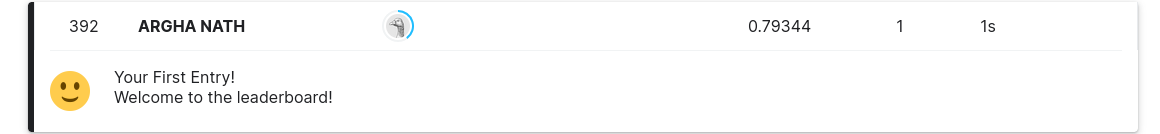

In [60]:
model_5_submission= pd.DataFrame({'id': test['id'], 'target': (model_5_preds.numpy())})
model_5_submission

,id,target
0,0,1
1,2,0
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,0
3260,10868,1
3261,10874,1


In [61]:
model_5_submission.to_csv('baseline_naive_bayes_submission.csv', index=False)

## Ensemble Model

This is Done on the Introduction to NLP Notebook -> https://github.com/arghanath007/MachineLearning/blob/main/Natural_language_Processing(NLP)/Introduction_to_Natural_Language_Processing_or_NLP.ipynb

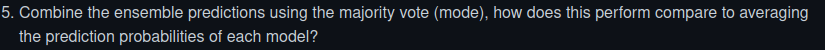